<a href="https://colab.research.google.com/github/JaymeNeto/nlp-tweets-disaster/blob/master/tweet-disaster-or-not-disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

tweets = pd.read_csv('train.csv')
pd.set_option('max_colwidth', 280)

In [ ]:
tweets[tweets.target==1].text

0                                                                           Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1                                                                                                          Forest fire near La Ronge Sask. Canada
2           All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3                                                                               13,000 people receive #wildfires evacuation orders in California 
4                                                        Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
                                                                          ...                                                                    
7608                                                          Two giant cranes holding a bridge collapse into nearby homes h

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')
doc = nlp(tweets[tweets.target==1].text[0])
type(doc)

spacy.tokens.doc.Doc

In [ ]:
from spacy.lang.en import English
parser = English()
mytoken = parser(tweets[tweets.target==1].text[0])
type(mytoken)

spacy.tokens.doc.Doc

In [ ]:
doc == mytoken

False

In [ ]:
doc = nlp(tweets[tweets.target==1].text[0])

In [ ]:
for token in doc:
  print(token.text, token.pos_, token.dep_, token.head.text, token.is_stop, token.is_punct, token.is_quote)

Our DET poss Deeds True False False
Deeds NOUN nsubj are False False False
are AUX ROOT are True False False
the DET det Reason True False False
Reason NOUN attr are False False False
of ADP prep Reason True False False
this DET det earthquake True False False
# NOUN compound earthquake False True False
earthquake NOUN pobj of False False False
May VERB aux Forgive True False False
ALLAH PROPN nsubj Forgive False False False
Forgive VERB ROOT Forgive False False False
us PRON dobj Forgive True False False
all DET appos us True False False


In [ ]:
doc.ents

()

In [ ]:
import re

def remove_user(text):
    return re.sub("@[\S]*", "", text)

def check_valid_word(token):
    return token.is_stop or token.like_url or token.is_punct

tweets['treated'] = tweets['text'].apply(lambda x: ' '.join([token.text for token in nlp(remove_user(x)) if not check_valid_word(token)]))

In [ ]:
tweets

,id,keyword,location,text,target,treated
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,Deeds Reason earthquake ALLAH Forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,residents asked shelter place notified officers evacuation shelter place orders expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,"13,000 people receive wildfires evacuation orders California"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo Ruby Alaska smoke wildfires pours school
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,giant cranes holding bridge collapse nearby homes
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,@aria_ahrary @TheTawniest control wild fires California Northern state troubling
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,M1.94 01:04 UTC]?5 km S Volcano Hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,Police investigating e bike collided car Little Portugal E bike rider suffered non life threatening injuries


In [ ]:
    tweets['treated'] = tweets['treated'].apply(lambda x: ' '.join( [ token.lemma_.lower() for token in nlp(x)] ) )

In [ ]:
tweets

,id,keyword,location,text,target,treated
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident ask shelter place notify officer evacuation shelter place order expect
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,"13,000 people receive wildfire evacuation order california"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,get send photo ruby alaska smoke wildfire pour school
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,giant crane hold bridge collapse nearby home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,@aria_ahrary @thetawniest control wild fire california northern state troubling
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,m1.94 01:04 utc]?5 km s volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,police investigate e bike collide car little portugal e bike rider suffer non life threatening injury


In [ ]:
doc = nlp('e-mail')
for token in doc:
  print(token.text, token.pos_, token.dep_, token.head.text, token.is_stop, token.is_punct, token.is_quote)

e X dep - False False False
- NOUN dep mail False True False
mail NOUN ROOT mail False False False


In [ ]:
from PIL import Image
import numpy as np
from os import path

d = os.getcwd()
twitter_mask = np.array(Image.open(path.join(d, "twitter_mask.png")))


(-0.5, 999.5, 807.5, -0.5)

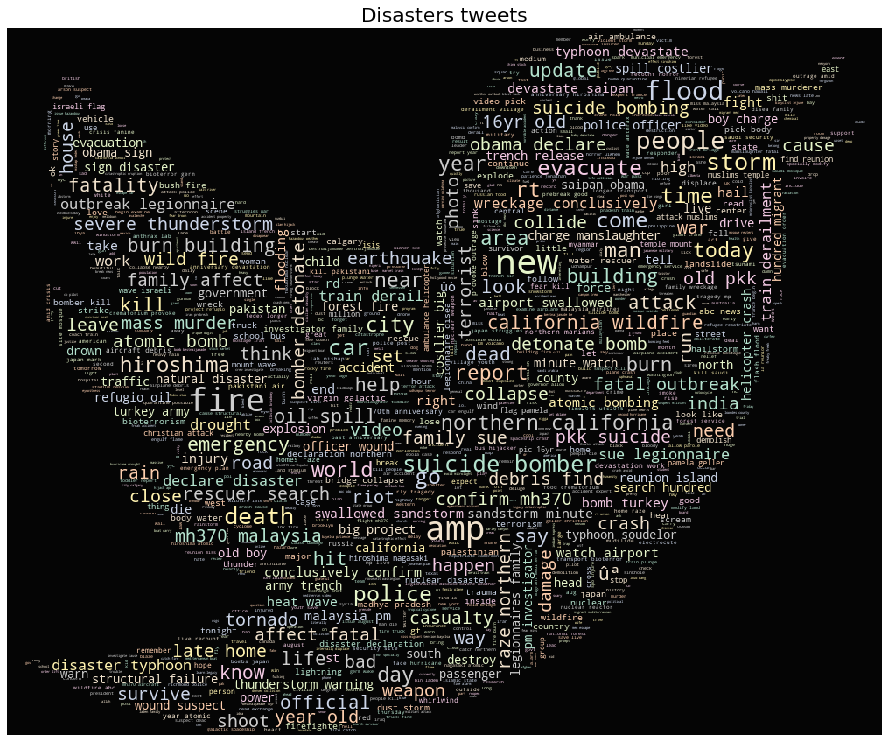

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline
# The wordcloud of Cthulhu/squidy thing for HP Lovecraft
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, mask = twitter_mask, max_font_size= 40)
wc.generate(" ".join(tweets[tweets.target == 1].treated))
plt.title("Disasters tweets", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

(-0.5, 999.5, 807.5, -0.5)

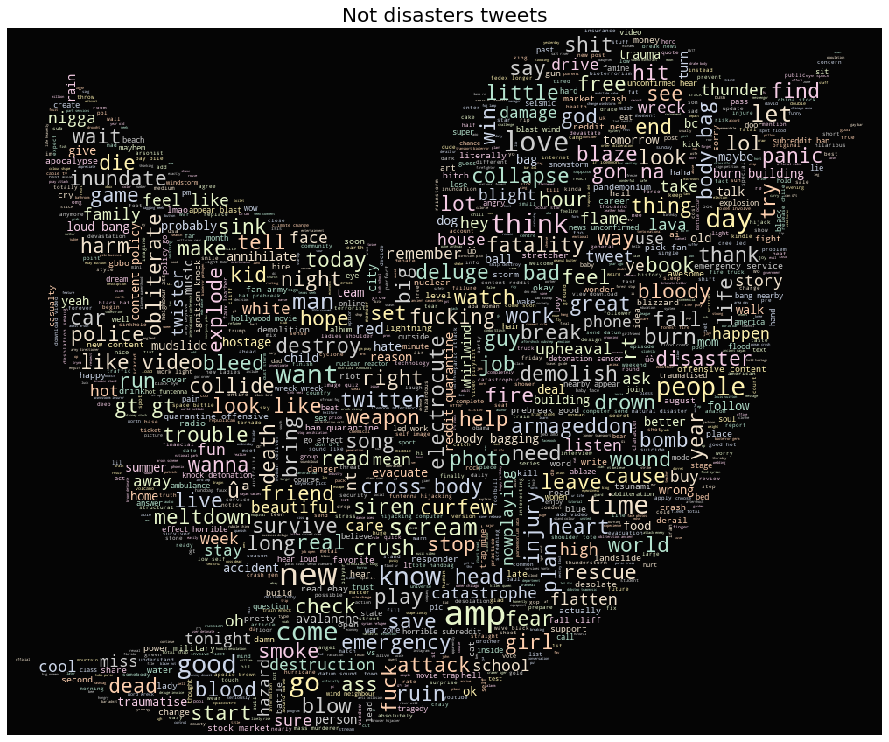

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline
# The wordcloud of Cthulhu/squidy thing for HP Lovecraft
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, mask = twitter_mask, max_font_size= 40)
wc.generate(" ".join(tweets[tweets.target == 0].treated))
plt.title("Not disasters tweets", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

In [ ]:
doc = nlp('BBCNews')
for token in doc:
  print(token.text, token.pos_, token.dep_, token.head.text, token.is_stop, token.is_punct, token.is_quote)

BBCNews PROPN ROOT BBCNews False False False


In [ ]:
doc = nlp('some')
x = nlp('some').vector
x.size

300

In [ ]:
spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
amp = [text for text in tweets.treated if 'amp ' in text]

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(tweets['treated'],tweets['target'],random_state = 0)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', LogisticRegression()),
])

model_linear_regression = pipeline_sgd.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
y_predict = model_linear_regression.predict(X_test)
print(classification_report(y_test, y_predict))

precision    recall  f1-score   support

           0       0.80      0.90      0.85      1107
           1       0.83      0.69      0.76       797

    accuracy                           0.81      1904
   macro avg       0.82      0.80      0.80      1904
weighted avg       0.81      0.81      0.81      1904



In [ ]:
class vetor():

    def transform(self, X):
        pass

    def fit(self, X):
        return nlp(X.treated).vector

In [ ]:
pipeline_lr = Pipeline([
    ('vect', vetor()),
    ('nb', LogisticRegression()),
])

model_linear_regression = pipeline_sgd.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

precision    recall  f1-score   support

           0       0.81      0.87      0.84      1107
           1       0.80      0.72      0.76       797

    accuracy                           0.81      1904
   macro avg       0.81      0.80      0.80      1904
weighted avg       0.81      0.81      0.81      1904



In [ ]:
test_data = pd.read_csv('test.csv')

submission_test_clean = test_data.copy()
submission_test_clean['treated'] = submission_test_clean['text'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not check_valid_word(token)]))
submission_test_clean['treated'] = submission_test_clean['treated'].apply(lambda x: ' '.join( [ token.lemma_.lower() for token in nlp(x)] ) )
submission_test_clean.head()

,id,keyword,location,text,treated
0,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",hear earthquake different city stay safe
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",forest fire spot pond goose flee street save
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan


In [ ]:
submission_test_pred = model_linear_regression.predict(submission_test_clean['treated'])

In [ ]:
id_col = test_data['id']
submission_df_1 = pd.DataFrame({
                  "id": id_col, 
                  "target": submission_test_pred})
submission_df_1

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
submission_df_1.to_csv('submission_4.csv', index=False)